# Model Description

\begin{align}
H_{{\rm S}} & =\sum_{i}\overrightarrow{h_{i}}\cdot\overrightarrow{\sigma_{i}}+\sum_{ij\alpha\beta}A_{ij}\sigma_{i}^{\alpha}\sigma_{j}^{\beta},\\
\overrightarrow{\sigma_{i}} & =\left(\sigma_{i}^{x},\sigma_{i}^{y},\sigma_{i}^{z}\right),\\
\alpha,\beta & \in\left\{ x,y,z\right\} ,\\
\sigma_{i}^{x} & =\begin{pmatrix}0 & 1\\
1 & 0
\end{pmatrix},\\
\sigma_{i}^{y} & =\begin{pmatrix}0 & -{\rm i}\\
{\rm i} & 0
\end{pmatrix},\\
\sigma_{i}^{z} & =\begin{pmatrix}1 & 0\\
0 & -1
\end{pmatrix},\\
\mathcal{L} & \Rightarrow\sqrt{\gamma_{+}}\sigma_{i}^{+},\sqrt{\gamma_{-}}\sigma_{i}^{-},\sqrt{\gamma_{z}}\sigma_{i}^{z},\\
\sigma_{i}^{+} & =\begin{pmatrix}0 & 1\\
0 & 0
\end{pmatrix},\\
\sigma_{i}^{-} & =\begin{pmatrix}0 & 0\\
1 & 0
\end{pmatrix},\\
\sigma_{i}^{z} & =\begin{pmatrix}1 & 0\\
0 & -1
\end{pmatrix},\\
{\rm i}\frac{\partial\rho}{\partial t} & =\left[H,\rho\right]+\mathcal{L}\left[\rho\right],\\
\mathcal{L}\left[\rho\right] & =-\sum_{i,\eta}\gamma_{\eta}\left(\rho A_{\eta}^{\dagger i}A_{\eta}^{i}+A_{\eta}^{\dagger i}A_{\eta}^{i}\rho-2A_{\eta}^{i}\rho A_{\eta}^{\dagger i}\right),\\
A_{\eta}^{i} & =\sigma_{i}^{\eta},\eta\!\in\!\left\{ +,-,z\right\} ,\\
\frac{\partial\rho}{\partial t} & =-{\rm i}\left[H_{{\rm S}},\rho\right]-\sum_{i,\eta}\gamma_{\eta}\left(\rho A_{\eta}^{\dagger i}A_{\eta}^{i}+A_{\eta}^{\dagger i}A_{\eta}^{i}\rho-2A_{\eta}^{i}\rho A_{\eta}^{\dagger i}\right).
\end{align}

In [12]:
import numpy as np
import qutip.testing as qt
#qt.run()
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from neupy import plots
import time

We construct at first the term $\Sigma_i\overrightarrow{h_{i}}\cdot\overrightarrow{\sigma_{i}}$.

In [13]:
# Matrix of vectors Nx3. This will be set by the user.

#--------------------------------------------------------------------------------------------

#code_block
N=4 #Number of spins to be considered starting from the position 0

#Matr_h=[[0,-1,0.2],[0.4,0.2,-0.1],[0.2,-0.4,0.1],[-1,1,1]]   #Matrix for N=4 shown as example

Matr_h=np.random.randn(N, 3)

#Vector form of Pauli matrices

def dot_arr_matr(f):
    return f[0]*sigmax()+f[1]*sigmay()+f[2]*sigmaz()

def Pauli(i):
    if i==1:
        return sigmax()
    elif i==2:
        return sigmay()
    elif i==3:
        return sigmaz()

#--------------------------------------------------------------------------------------------



0.00902104377746582 0.34504079818725586


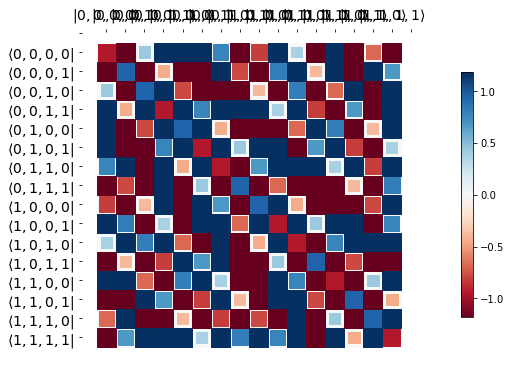

In [14]:
# Matrix of vectors Nx3. This will be set by the user.

t0 = time.time()
#--------------------------------------------------------------------------------------------

# Independent hamiltonian of the system
H_ind=[]

for j in range(N):
    H_ind.append(dot_arr_matr(Matr_h[j])) 

    
H=tensor(H_ind)    
t1 = time.time()

hinton(H)

#--------------------------------------------------------------------------------------------


t2 = time.time()

total = t1-t0

print(t1-t0,t2-t0)

0.05800032615661621 0.28104424476623535


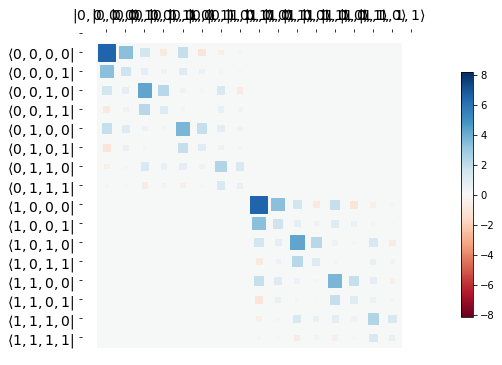

In [15]:
# Matrix of vectors Nx3. This will be set by the user.

t0 = time.time()
#--------------------------------------------------------------------------------------------




#The user can set also the interaction matrix which contains information of the interaction between the spins.

A=np.random.randn(2**N, 2**N)
Sum_Pauli=Pauli(1)+Pauli(2)+Pauli(3)


System_inter=[]
for j in range(N): 
    System_inter.append(qeye(2)) 
    
def sum_ar(A,B):
    C=[]
    for j in range(N): 
        C.append(qeye(2)) 
    for j in range(len(A)):
        C[j]=A[j]+B[j]
    return C

    
    
def Contr_int(i,j):
    C=[]
    for j in range(N): 
        C.append(qeye(2))
    if i==j:    
        C[i]=3*qeye(2)
    elif i!=j:
        C[i]=Sum_Pauli
        C[j]=Sum_Pauli
    return C

for j in range(N):
    for i in range(N):
        System_inter=sum_ar(System_inter,np.multiply(Contr_int(i,j),A[i][j]/(3*np.max(A))))
        
Hint=tensor(System_inter)

t1 = time.time()

hinton(Hint)

#--------------------------------------------------------------------------------------------


t2 = time.time()

total = t1-t0

print(t1-t0,t2-t0)






(<Figure size 576x432 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x242265a9c70>)

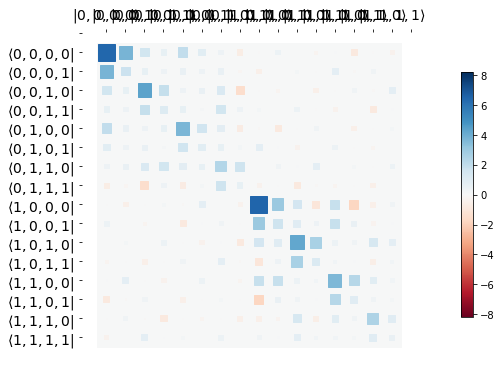

In [16]:
H=H+Hint  #System Hamiltonian
hinton(H)